In [1]:
import re, json
import matplotlib.pyplot as plt
import numpy as np

def detregPlotLoss(txtPath, task, title, start=0, end=None):
    txt = open(txtPath,"r").read()
    txtL = re.findall("\{(.*)\}", txt) # epoch split
    plt.title(title, fontsize=16)
    plt.xlabel("epochs", fontsize=16)
    plt.ylabel("loss", fontsize=16)
    if task:
        train_loss_L = [ json.loads("{"+txtL[i]+"}")["train_loss"] for i in range(len(txtL)) ]
        plt.plot(train_loss_L[start:end])
    if task=="finetune":
        val_loss_L   = [ json.loads("{"+txtL[i]+"}")["test_loss"] for i in range(len(txtL)) ]
        plt.plot(val_loss_L[start:end])
    plt.grid('on')
    plt.show()
    n = len(train_loss_L)
    print(f"min(zip(train_loss_L,range(n)))={min(zip(train_loss_L,range(n)))}" if task=="pretext" else \
          f"min(zip(val_loss_L,range(n)))={min(zip(val_loss_L,range(n)))}")
    return train_loss_L if task=="pretext" else val_loss_L

pretextDefault = {"maWindow":40, "criterion":-0.001, "ylim":(-0.005,0)}
downstreamNormalDefault = {"maWindow":40, "criterion":-0.001, "ylim":(-0.005,0)}
downstreamDecayDefault = {"maWindow":40, "criterion":-0.001, "ylim":(-0.005,0)}
def plotAvg(lossL, title, maWindow=None, criterion=None, ylim=None):        
    maSlope = [ (lossL[i+maWindow]-lossL[i])/maWindow for i in range(len(lossL)-maWindow) ]
    plt.title(title, fontsize=16)
    plt.plot(maSlope)
    plt.hlines(criterion, -1, len(lossL), colors="#FF0000") # y,xmin,xmax
    plt.grid('on')
    plt.ylim(*ylim) # -0.001
    plt.xlabel(f"epoch + {maWindow}", fontsize=16)
    plt.ylabel(f"loss slope movAvg({maWindow})", fontsize=16)
    plt.show()
    overCriterion = list(filter(lambda tup:tup[1]>=criterion,zip(range(len(maSlope)),maSlope)))
    print( f"over_ep={ overCriterion[0][0]+maWindow }" if overCriterion else f"last_ep={len(lossL)-1}, last slope={maSlope[-1]}" )
    return maSlope

### Pretext

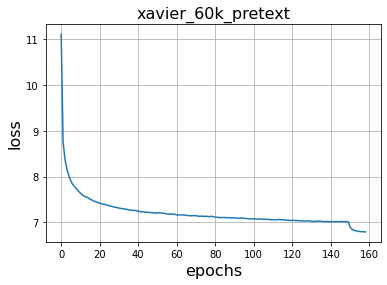

min(zip(train_loss_L,range(n)))=(6.793687584511516, 158)


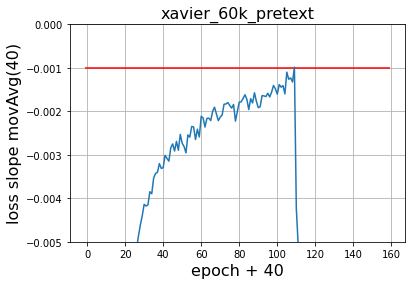

over_ep=149


In [15]:
trainL = detregPlotLoss("../_exps/pretext/xavier_60k/log.txt","pretext","xavier_60k_pretext")
maL = plotAvg(trainL, "xavier_60k_pretext", **pretextDefault)

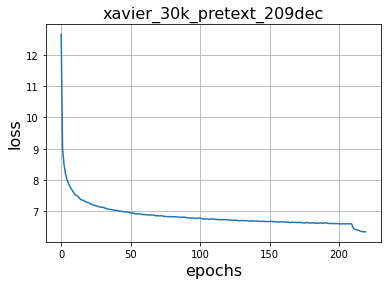

min(zip(train_loss_L,range(n)))=(6.347171071139821, 219)


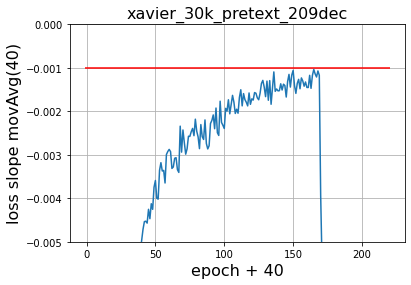

last_ep=219, last slope=-0.007177657640776358


In [190]:
trainL = detregPlotLoss("../_exps/pretext/xavier_30k/log.txt","pretext","xavier_30k_pretext_209dec")
maL = plotAvg(trainL, "xavier_30k_pretext_209dec", **pretextDefault)

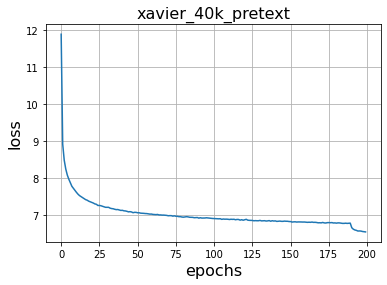

min(zip(train_loss_L,range(n)))=(6.5322975371990095, 199)


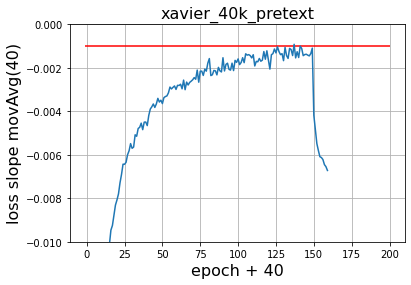

over_ep=177


In [199]:
trainL = detregPlotLoss("../_exps/pretext/xavier_40k_ep200/log.txt","pretext","xavier_40k_pretext")
#maL = plotAvg(trainL, "xavier_40k_pretext", **pretextDefault)
maL = plotAvg(trainL, "xavier_40k_pretext", **{"maWindow":40, "criterion":-0.001, "ylim":(-0.01,0)})

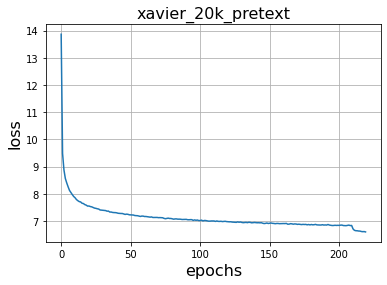

min(zip(train_loss_L,range(n)))=(6.599005249633425, 219)


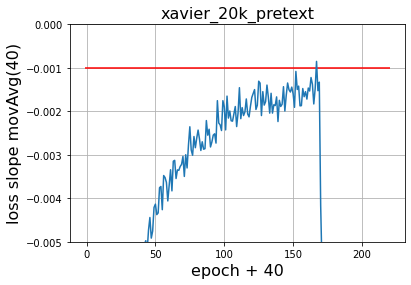

over_ep=207


In [213]:
trainL = detregPlotLoss("../_exps/pretext/xavier_20k/log.txt","pretext","xavier_20k_pretext")
maL = plotAvg(trainL, "xavier_20k_pretext", **pretextDefault)
#trainL = detregPlotLoss("../_exps/pretext/xavier_20k/over/log.txt","pretext","xavier_20k_pretext")

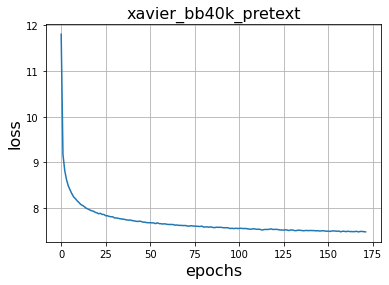

min(zip(train_loss_L,range(n)))=(7.477697899497803, 167)


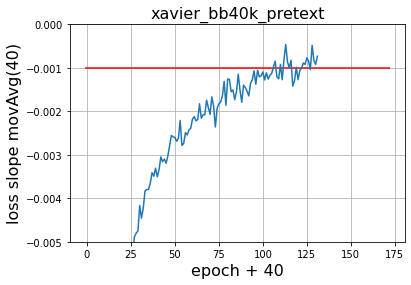

over_ep=146


In [13]:
trainL = detregPlotLoss("../_exps/pretext/xavier_bb40k/log.txt","pretext","xavier_bb40k_pretext")
maL = plotAvg(trainL, "xavier_bb40k_pretext", **pretextDefault)
#trainL = detregPlotLoss("../_exps/pretext/xavier_20k/over/log.txt","pretext","xavier_20k_pretext")

### Downstream

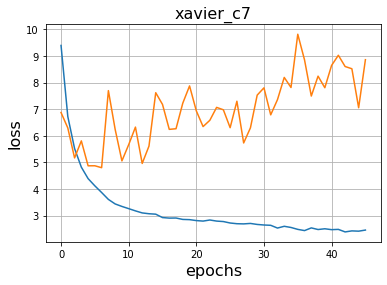

min(zip(val_loss_L,range(n)))=(4.799273265374674, 6)


In [6]:
valL = detregPlotLoss("../_exps/downstream/xavier_c7/log.txt","finetune","xavier_c7")

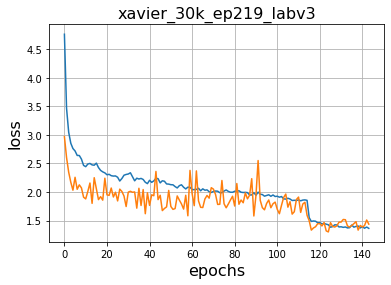

min(zip(val_loss_L,range(n)))=(1.3006910726152385, 124)


In [104]:
valL = detregPlotLoss("../_exps/downstream/xavier_30k_ep219/log.txt","finetune","xavier_30k_ep219_labv3")

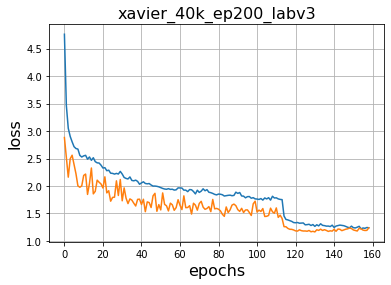

min(zip(val_loss_L,range(n)))=(1.1638536221970845, 130)


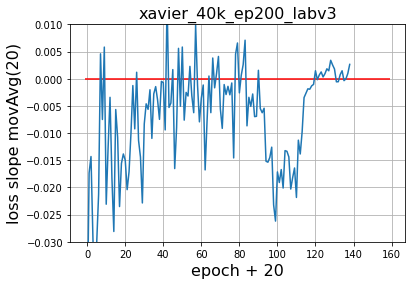

over_ep=27


In [201]:
valL = detregPlotLoss("../_exps/downstream/40k_ep200_labv3/log.txt","finetune","xavier_40k_ep200_labv3")
maL = plotAvg(valL, "xavier_40k_ep200_labv3", **{"maWindow":20, "criterion":0, "ylim":(-0.03,0.01)})

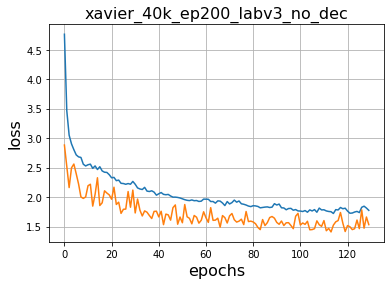

min(zip(val_loss_L,range(n)))=(1.408540559308165, 113)


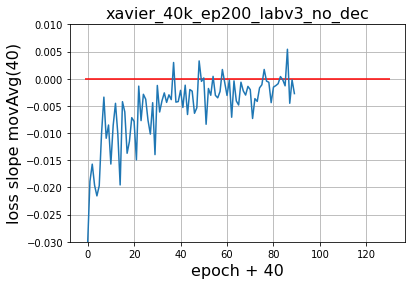

over_ep=77


In [204]:
valL = detregPlotLoss("../_exps/downstream/40k_ep200_labv3/log_over.txt","finetune","xavier_40k_ep200_labv3_no_dec")
maL = plotAvg(valL, "xavier_40k_ep200_labv3_no_dec", **{"maWindow":40, "criterion":0, "ylim":(-0.03,0.01)})

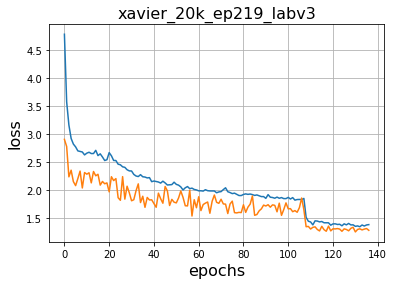

min(zip(val_loss_L,range(n)))=(1.252980461516836, 130)


1.281970469910816

In [239]:
valL = detregPlotLoss("../_exps/downstream/xavier_20k_ep219/log.txt","finetune","xavier_20k_ep219_labv3")
# 130 # 0.902 # 0.933
# 135 # 0.939 # 0.943
# 137 # 0.940 # 0.945
valL[-1]

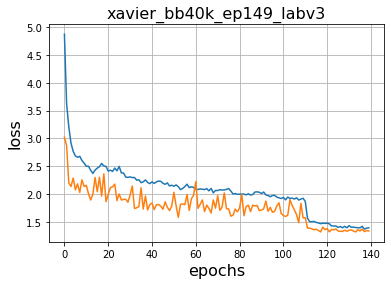

min(zip(val_loss_L,range(n)))=(1.3174535699305623, 133)
1.347750023368762


[(100, 1.86, 0.935, 0.925),
 (101, 1.853, 0.921, 0.932),
 (102, 1.849, 0.916, 0.933),
 (103, 1.803, 0.889, 0.914),
 (104, 1.829, 0.925, 0.904),
 (105, 1.852, 0.926, 0.926),
 (106, 1.87, 0.916, 0.954),
 (107, 1.905, 0.964, 0.941),
 (108, 1.77, 0.875, 0.895),
 (109, 1.848, 0.94, 0.908),
 (110, 1.85, 0.916, 0.934),
 (111, 1.886, 0.938, 0.948),
 (112, 1.912, 0.964, 0.948),
 (113, 1.899, 0.956, 0.943),
 (114, 1.908, 0.961, 0.947),
 (115, 1.912, 0.968, 0.944),
 (116, 1.907, 0.963, 0.944),
 (117, 1.915, 0.97, 0.945),
 (118, 1.917, 0.973, 0.944),
 (119, 1.911, 0.974, 0.937),
 (120, 1.913, 0.972, 0.941),
 (121, 1.907, 0.971, 0.936),
 (122, 1.923, 0.973, 0.95),
 (123, 1.914, 0.973, 0.941),
 (124, 1.898, 0.953, 0.945),
 (125, 1.915, 0.97, 0.945),
 (126, 1.902, 0.967, 0.935),
 (127, 1.917, 0.976, 0.941),
 (128, 1.925, 0.979, 0.946),
 (129, 1.91, 0.972, 0.938),
 (130, 1.917, 0.97, 0.947),
 (131, 1.913, 0.973, 0.94),
 (132, 1.907, 0.971, 0.936),
 (133, 1.9, 0.967, 0.933),
 (134, 1.911, 0.968, 0.943)

In [12]:
valL = detregPlotLoss("../_exps/downstream/xavier_bb40k_ep149/log.txt","finetune","xavier_bb40k_ep149_labv3")
print(valL[128])
#maL = plotAvg(valL, "xavier_bb40k_ep149_labv3", **{"maWindow":40, "criterion":0, "ylim":(-0.03,0.01)})
txt = open("../_exps/downstream/xavier_bb40k_ep149/eval.txt").read()
apL = re.findall("Average Precision.*IoU=0.50 .*= (.*)\n",txt)
apL = list(map(lambda s:round(float(s),3),apL))
arL = re.findall("Average Recall.* all.*100.*= (.*)\n", txt)
arL = list(map(lambda s:round(float(s),3),arL))
allL = [ (i,round(ap+ar,3),ap,ar) for i,ap,ar in zip(range(100,100+len(apL)),apL,arL) ]
allL

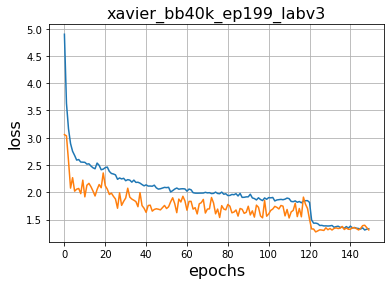

min(zip(val_loss_L,range(n)))=(1.2736502321232404, 123)
1.2918319839043555


[(120, 1.824, 0.897, 0.927),
 (121, 1.865, 0.92, 0.945),
 (122, 1.875, 0.925, 0.95),
 (123, 1.878, 0.929, 0.949),
 (124, 1.882, 0.933, 0.949),
 (125, 1.868, 0.918, 0.95),
 (126, 1.874, 0.927, 0.947),
 (127, 1.87, 0.915, 0.955),
 (128, 1.86, 0.92, 0.94),
 (129, 1.873, 0.925, 0.948)]

In [22]:
valL = detregPlotLoss("../_exps/downstream/xavier_bb40k_ep199/log.txt","finetune","xavier_bb40k_ep199_labv3")
print(valL[124])
#maL = plotAvg(valL, "xavier_bb40k_ep149_labv3", **{"maWindow":40, "criterion":0, "ylim":(-0.03,0.01)})
txt = open("../_exps/downstream/xavier_bb40k_ep199/eval.txt").read()
apL = re.findall("Average Precision.*IoU=0.50 .*= (.*)\n",txt)
apL = list(map(lambda s:round(float(s),3),apL))
arL = re.findall("Average Recall.* all.*100.*= (.*)\n", txt)
arL = list(map(lambda s:round(float(s),3),arL))
allL = [ (i,round(ap+ar,3),ap,ar) for i,ap,ar in zip(range(120,120+len(apL)),apL,arL) ]
allL

### Compare

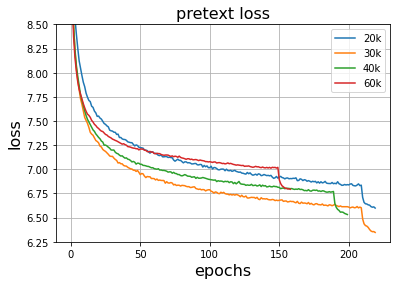

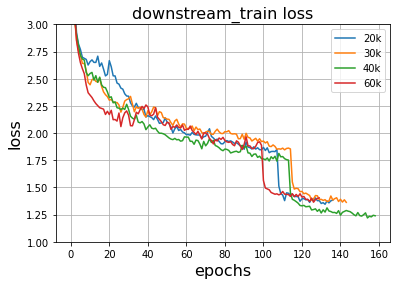

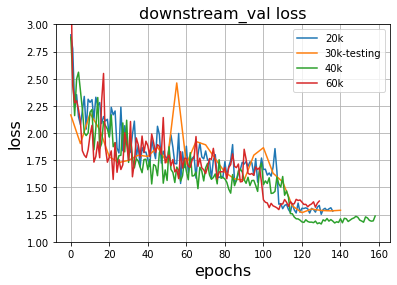

In [299]:
def plotCompare(task, pathL, nameL):
    assert task in ["pretext","downstream_train","downstream_val"] and len(pathL)==len(nameL)
    plt.title(f"{task} loss", fontsize=16)
    for path in pathL:
        txt      = open(path,"r").read()
        txtL     = re.findall("\{(.*)\}", txt)
        lossName = "train_loss" if task in ["pretext","downstream_train"] else "test_loss"
        lossL   = [ json.loads("{"+txtL[i]+"}")[lossName] for i in range(len(txtL)) ]
        
        if task=="downstream_val" and path=="../_exps/downstream/xavier_30k_ep219/log.txt":
            lossL = lossInterL
        
        plt.plot(lossL)
    plt.grid('on')
    plt.ylim(6.25,8.5) if task=="pretext" else plt.ylim(1,3)
    plt.legend(labels=nameL)
    plt.xlabel("epochs", fontsize=16)
    plt.ylabel("loss", fontsize=16)
    #plt.savefig(f"{task}.jpg")
    plt.show()
        
plotCompare("pretext", \
            ["../_exps/pretext/xavier_20k/log.txt", "../_exps/pretext/xavier_30k/log.txt", "../_exps/pretext/xavier_40k_ep200/log.txt", "../_exps/pretext/xavier_60k/log.txt"], \
            ["20k","30k","40k","60k"])

plotCompare("downstream_train", 
            ["../_exps/downstream/xavier_20k_ep219/log.txt", "../_exps/downstream/xavier_30k_ep219/log.txt", "../_exps/downstream/40k_ep200_labv3/log.txt", "../_exps/downstream/xavier_60k_ep154/log.txt"],
            ["20k","30k","40k","60k"])

plotCompare("downstream_val", 
            ["../_exps/downstream/xavier_20k_ep219/log.txt", "../_exps/downstream/xavier_30k_ep219/log.txt", "../_exps/downstream/40k_ep200_labv3/log.txt", "../_exps/downstream/xavier_60k_ep154/log.txt"],
            ["20k","30k-testing","40k","60k"])

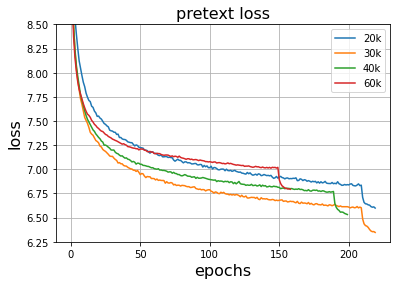

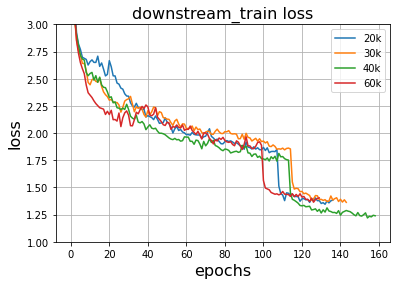

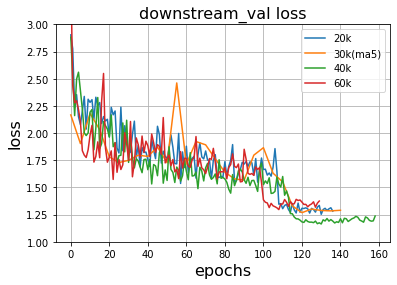

In [300]:
plotCompare("pretext", \
            ["../_exps/pretext/xavier_20k/log.txt", "../_exps/pretext/xavier_30k/log.txt", "../_exps/pretext/xavier_40k_ep200/log.txt", "../_exps/pretext/xavier_60k/log.txt"], \
            ["20k","30k","40k","60k"])

plotCompare("downstream_train", 
            ["../_exps/downstream/xavier_20k_ep219/log.txt", "../_exps/downstream/xavier_30k_ep219/log.txt", "../_exps/downstream/40k_ep200_labv3/log.txt", "../_exps/downstream/xavier_60k_ep154/log.txt"],
            ["20k","30k","40k","60k"])

plotCompare("downstream_val", 
            ["../_exps/downstream/xavier_20k_ep219/log.txt", "../_exps/downstream/xavier_30k_ep219/log.txt", "../_exps/downstream/40k_ep200_labv3/log.txt", "../_exps/downstream/xavier_60k_ep154/log.txt"],
            ["20k","30k(ma5)","40k","60k"])

In [289]:
r = open("../_exps/downstream/xavier_30k_ep219/eval.txt", "r").read()
#apL = re.findall("Average Precision.*IoU=0.50 .*= (.*)\n", r)
#arL = re.findall("Average Recall.* all.*100.*= (.*)\n", r)
lossL = re.findall("Averaged stats.*loss: [0-9,.]* \((.*?)\)", r)
lossL = list(map(lambda s:float(s),lossL[1:]+[lossL[0]]))
lossInterL = []
for i in range(len(lossL)*5-5):
    d, r = i//5, i%5
    lossInterL.append( lossL[d]*(1-0.2*r)+lossL[d+1]*0.2*r )
lossInterL.append(lossL[-1])

txtL = re.findall("\{(.*)\}", open("../_exps/downstream/xavier_30k_ep219/log.txt","r").read())
train_loss_L = [ json.loads("{"+txtL[i]+"}")["train_loss"] for i in range(len(txtL)) ]

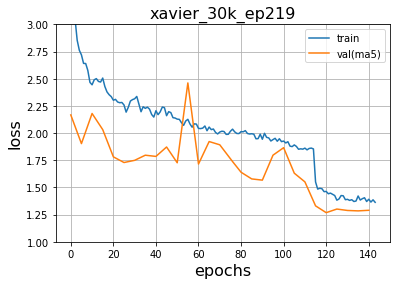

In [292]:
plt.plot( train_loss_L )
plt.plot( lossInterL )
plt.ylim(1,3)
plt.grid('on')
plt.title("xavier_30k_ep219", fontsize=16)
plt.xlabel("epochs", fontsize=16)
plt.ylabel("loss", fontsize=16)
plt.legend(labels=['train','val(ma5)'])
plt.show()

In [298]:
print(lossInterL)

[2.1669, 2.11416, 2.06142, 2.00868, 1.95594, 1.9032, 1.9586000000000001, 2.0140000000000002, 2.0694, 2.1248, 2.1802, 2.1505400000000003, 2.1208799999999997, 2.09122, 2.0615599999999996, 2.0319, 1.9817999999999998, 1.9317, 1.8816, 1.8315000000000001, 1.7814, 1.77096, 1.76052, 1.75008, 1.73964, 1.7292, 1.7332200000000002, 1.7372400000000001, 1.74126, 1.7452800000000002, 1.7493, 1.7587400000000002, 1.76818, 1.77762, 1.7870599999999999, 1.7965, 1.79428, 1.79206, 1.7898399999999999, 1.7876200000000002, 1.7854, 1.8027000000000002, 1.8199999999999998, 1.8373, 1.8546, 1.8719, 1.84292, 1.8139399999999999, 1.7849599999999999, 1.75598, 1.727, 1.8738400000000002, 2.02068, 2.1675199999999997, 2.3143599999999998, 2.4612, 2.31202, 2.16284, 2.01366, 1.86448, 1.7153, 1.75666, 1.79802, 1.8393799999999998, 1.8807399999999999, 1.9221, 1.9161, 1.9101, 1.9040999999999997, 1.8981, 1.8921, 1.86624, 1.84038, 1.8145199999999997, 1.7886599999999997, 1.7628, 1.7382, 1.7136, 1.689, 1.6644, 1.6398, 1.62752, 1.61524